# API to extract data from Tiingo to: US stock data, Forex and cryptocurrencies

*2S by SRS*

Date: 2024-02-26


exporting data of https://app.tiingo.com/

site: https://www.tiingo.com/

In [92]:
# Installing libraries
!pip install tiingo


In [93]:
# importing libraries
from tiingo import TiingoClient
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [94]:
# Key of Tiingo
api_key = 'enter the api key here'

config = {
    'api_key': api_key,
    'session': True
}

client = TiingoClient(config)

In [95]:
# Searching metadata for a specific ticker
client.get_ticker_metadata('BTC')


{'ticker': 'PIFI',
 'name': 'CLEARSHARES PITON INTERMEDIATE FIXED INCOME ETF ',
 'description': 'The Fund is an actively managed exchange-traded fund (“ETF”) that seeks to achieve its investment objective by investing, under normal market conditions, at least 80% of its net assets (plus borrowings for investment purposes) in debt securities and other instruments that have economic characteristics similar to such securities. The Fund principally invests in U.S.-dollar denominated, investment-grade securities and seeks to typically maintain a dollar-weighted average portfolio maturity of zero to ten years. The Fund may invest in instruments with a range of maturities, including short-, medium- or long-term maturities. The Fund seeks to typically maintain an average portfolio duration of three to five years. Duration is the weighted-average time in years for an investor to recoup the cost of an investment from the cash flows associated with a bond or portfolio of bonds. It can be used as 

In [96]:
# Searching for quotes for a specific ticker

price = client.get_ticker_price('BTC',
                                fmt = 'json',
                                startDate ='2023-01-01',
                                endDate = '2024-02-28',
                                frequency = "daily")

df_work = pd.DataFrame(price)
df_work.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
285,2024-02-22T00:00:00.000Z,91.5213,91.5213,91.5213,91.5213,87,91.5213,91.5213,91.5213,91.5213,87,0.0,1.0
286,2024-02-23T00:00:00.000Z,91.5899,91.6500,91.5800,91.6500,317,91.5899,91.6500,91.5800,91.6500,317,0.0,1.0
287,2024-02-26T00:00:00.000Z,91.5553,91.5553,91.5100,91.5100,635,91.5553,91.5553,91.5100,91.5100,635,0.0,1.0
288,2024-02-27T00:00:00.000Z,91.4880,91.6100,91.4500,91.6100,724,91.4880,91.6100,91.4500,91.6100,724,0.0,1.0
289,2024-02-28T00:00:00.000Z,91.6407,91.6407,91.6407,91.6407,4,91.6407,91.6407,91.6407,91.6407,4,0.0,1.0


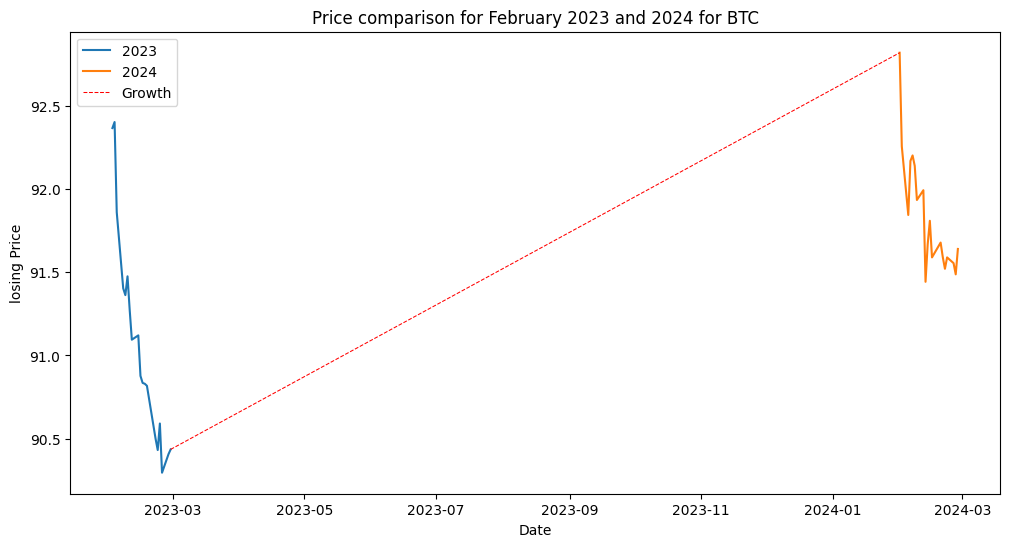

In [97]:
# Convert the 'date' column to datetime
df_work['date'] = pd.to_datetime(df_work['date'])

# Select the data to include only February 2023 and 2024
df_february = df_work[((df_work['date'] >= '2023-02-01') & (df_work['date'] <= '2023-02-28')) |
                       ((df_work['date'] >= '2024-02-01') & (df_work['date'] <= '2024-02-29'))]

# Create a graph comparing prices in February 2023 and 2024
plt.figure(figsize=(12, 6))
plt.plot(df_february[df_february['date'].dt.year == 2023]['date'], df_february[df_february['date'].dt.year == 2023]['close'], label='2023')
plt.plot(df_february[df_february['date'].dt.year == 2024]['date'], df_february[df_february['date'].dt.year == 2024]['close'], label='2024')

# Find the last value of 2023 and the first value of 2024
last_2023 = df_february[(df_february['date'].dt.year == 2023) & (df_february['date'].dt.month == 2)]['close'].iloc[-1]
first_2024 = df_february[(df_february['date'].dt.year == 2024) & (df_february['date'].dt.month == 2)]['close'].iloc[0]

# Draw a straight line between these two values
plt.plot([df_february[df_february['date'].dt.year == 2023]['date'].iloc[-1], df_february[df_february['date'].dt.year == 2024]['date'].iloc[0]],
         [last_2023, first_2024], 'r--', label='Growth', linewidth=0.75)

plt.title('Price comparison for February 2023 and 2024 for BTC')
plt.xlabel('Date')
plt.ylabel('losing Price')
plt.legend()
plt.show()


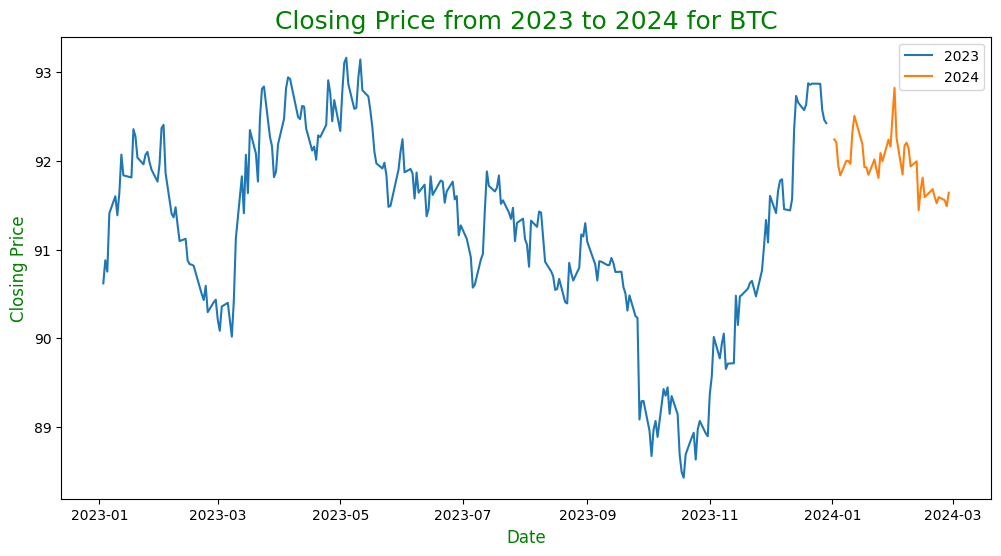

In [98]:

# Convert the 'date' column to datetime
df_work['date'] = pd.to_datetime(df_work['date'])

# Filter the data to include only data from 2023 and 2024
df_2023 = df_work[df_work['date'].dt.year == 2023]
df_2024 = df_work[df_work['date'].dt.year == 2024]

# Create a graph comparing prices in 2023 and 2024
plt.figure(figsize=(12, 6))
plt.plot(df_2023['date'], df_2023['close'], label='2023')
plt.plot(df_2024['date'], df_2024['close'], label='2024')
plt.title('Closing Price from 2023 to 2024 for BTC', fontsize='18', color='g')
plt.xlabel('Date', fontsize='12', color='g')
plt.ylabel('Closing Price', fontsize='12', color='g')
plt.legend()
plt.show()


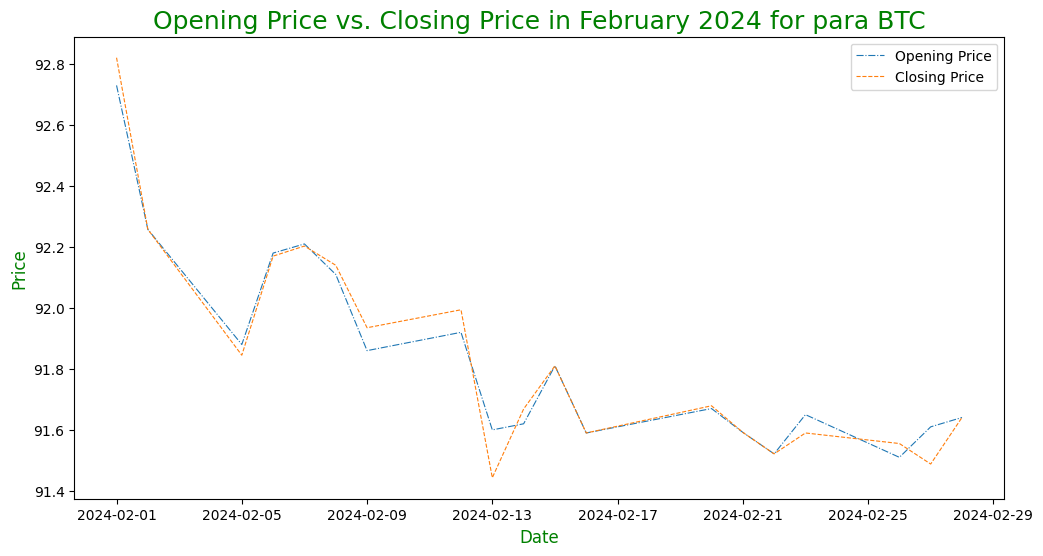

In [99]:
# Convert the 'date' column to datetime
df_work['date'] = pd.to_datetime(df_work['date'])

# Select the data to include only February 2024
df_february_2024 = df_work[(df_work['date'] >= '2024-02-01') & (df_work['date'] <= '2024-02-29')]

# Create a chart comparing the opening and closing prices in February 2024
plt.figure(figsize=(12, 6))
plt.plot(df_february_2024['date'], df_february_2024['open'], label='Opening Price', linestyle='-.', linewidth=0.8)
plt.plot(df_february_2024['date'], df_february_2024['close'], label='Closing Price', linestyle='--', linewidth=0.8)

plt.title('Opening Price vs. Closing Price in February 2024 for para BTC', fontsize='18', color='g' )
plt.xlabel('Date', fontsize='12', color='g' )
plt.ylabel('Price', fontsize='12', color='g')
plt.legend()
plt.show()


In [100]:
# Export to CSV and Excel
df_work.to_csv('BTC.csv', index=False)

# For Excel is necessary convert the date column to a data type without a time zone
df_work['date'] = df_work['date'].dt.tz_localize(None)
df_work.to_excel('BTC.xlsx', index=False)

